In [ ]:
Question 2

Accuracy
For instance, weather forecasting the likelihood of rain. The repercussions of making inaccurate predictions are comparable,
it is crucial that the model predicts both "rain" and "no rain" accurately the majority of the time.
Accuracy is the proportion of correctly identified cases (both true positives and true negatives) out of all cases. It 
provides a broad measure of how well a system is performing overall.

Sensitivity
For instance, cancer screening and finding out if a patient has cancer. High sensitivity reduces the possibility of a 
patient being mistakenly reassured they are cancer-free by guaranteeing the majority of cancer cases are identified.
Sensitivity focuses on correctly identifying the positive cases out of all actual positives. It emphasizes reducing false 
negatives, which are the cases where a positive instance is incorrectly labeled as negative.

Specificity
For instance, HIV Testing in Low-Prevalence Areas and determining if an individual is HIV-negative. High specificity 
preventsunnecessary follow-up testing, worry, and stigma by ensuring that healthy people are not mistakenly classified 
as HIV-positive.
Specificity measures the ability to correctly identify negative cases out of all actual negatives. It emphasizes reducing 
false positives, which occur when a negative instance is mislabeled as positive.

Precision
For instance, spam email detection The use case is determining if an email is "spam" or "not spam." By ensuring that only 
genuine spam emails are reported, high precision helps to avoid misclassifying critical communications as spam.
Precision evaluates the proportion of true positives among all cases predicted to be positive. It minimizes false positives
and ensures that flagged cases are genuinely positive.

In [ ]:
Question 4

In [5]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

In [11]:
from sklearn.model_selection import train_test_split

# Perform the 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab, test_size=0.2, random_state=42
)

# Check the sizes
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")

Training set size: 260
Testing set size: 65


In [15]:
# Shuffle the dataset and take 80% for training
ab_reduced_noNaN_train = ab.sample(frac=0.8, random_state=42)

# Use the remaining 20% for testing
ab_reduced_noNaN_test = ab.drop(ab_reduced_noNaN_train.index)

# Check the sizes
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")

Training set size: 260
Testing set size: 65


In [17]:
print(ab.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          325 non-null    object 
 1   Author         324 non-null    object 
 2   List Price     324 non-null    float64
 3   Amazon Price   325 non-null    float64
 4   Hard_or_Paper  325 non-null    object 
 5   NumPages       323 non-null    float64
 6   Publisher      324 non-null    object 
 7   Pub year       324 non-null    float64
 8   ISBN-10        325 non-null    object 
 9   Height         321 non-null    float64
 10  Width          320 non-null    float64
 11  Thick          324 non-null    float64
 12  Weight_oz      316 non-null    float64
dtypes: float64(8), object(5)
memory usage: 33.1+ KB
None


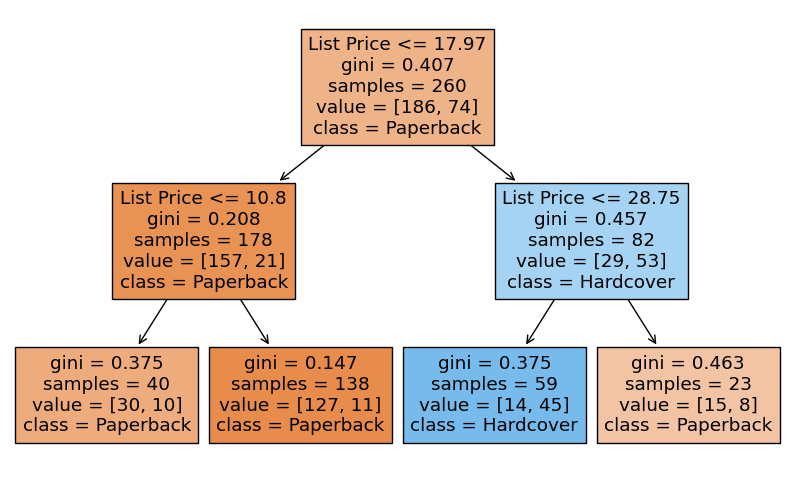

Training Accuracy: 0.8346153846153846
Testing Accuracy: 0.8461538461538461


In [21]:
from sklearn.tree import DecisionTreeClassifier

# Extract features (X) and target (y)
X = ab[['List Price']]  # Feature
y = pd.get_dummies(ab["Hard_or_Paper"])['H']  # Target (1 for Hardcover, 0 for Paperback)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Print tree structure (Optional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()

# Evaluate the model
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", clf.score(X_test, y_test))


[Text(0.5, 0.8333333333333334, 'x[0] <= 17.97\ngini = 0.407\nsamples = 260\nvalue = [186, 74]'),
 Text(0.25, 0.5, 'x[0] <= 10.8\ngini = 0.208\nsamples = 178\nvalue = [157, 21]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.375\nsamples = 40\nvalue = [30, 10]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]'),
 Text(0.75, 0.5, 'x[0] <= 28.75\ngini = 0.457\nsamples = 82\nvalue = [29, 53]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.375\nsamples = 59\nvalue = [14, 45]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.463\nsamples = 23\nvalue = [15, 8]')]

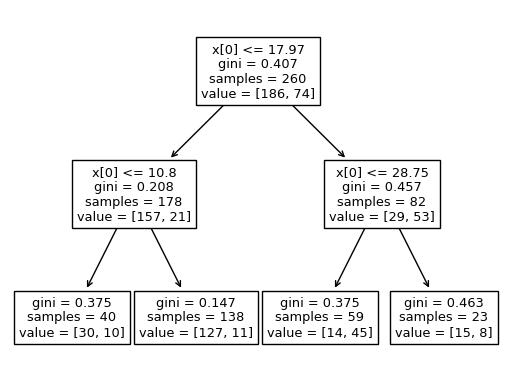

In [22]:
tree.plot_tree(clf)

In [ ]:
ChatBot Summary

1. Understanding "Positive" and "Negative"
Positive: The class of interest (e.g., detecting a disease).
Negative: The absence of the condition or outcome.
2. Confusion Matrix Overview
The confusion matrix for binary classification shows the relationship between true labels 
(y_true) and predicted labels (y_pred).
It consists of four components:
True Positives (TP): Correctly predicted positives.
True Negatives (TN): Correctly predicted negatives.
False Positives (FP): Negatives misclassified as positives.
False Negatives (FN): Positives misclassified as negatives.
3. Reading and Interpreting a Confusion Matrix
The matrix has the following layout:
[TNFP
FNTP]
Example: [[50 5] [10 35]] means 50 TN, 5 FP, 10 FN, and 35 TP.
4. Explanation of TP, TN, FP, FN
TP: Positive cases correctly predicted.
TN: Negative cases correctly predicted.
FP: Negative cases incorrectly predicted as positive.
FN: Positive cases incorrectly predicted as negative.
5. y_true and y_pred in confusion_matrix
In confusion_matrix(y_true, y_pred), y_true (actual labels) is passed first, followed by y_pred (predicted labels).

https://chatgpt.com/share/674005b3-0ce0-8012-97c3-7345f9c3cde2

In [ ]:
Question 6

In [29]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)

# Function to calculate sensitivity, specificity, and accuracy
def calculate_metrics(conf_matrix):
    TN, FP, FN, TP = conf_matrix.ravel()  # Binary classification assumption
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    accuracy = (TP + TN) / conf_matrix.sum()
    return sensitivity, specificity, accuracy

# Metrics for both models
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(conf_matrix_clf)

# Print metrics
print(f"Metrics for clf: Sensitivity = {sensitivity_clf}, Specificity = {specificity_clf}, Accuracy = {accuracy_clf}")

Metrics for clf: Sensitivity = 0.6666666666666666, Specificity = 0.9, Accuracy = 0.8461538461538461


In [ ]:
The code for clf2 won't work so I deleted it for clf to work without problems.

In [ ]:
Question 7
The features used to create the models are the cause of the variations between the two confusion matrices. 'List Price' 
is the only information used by the first model (clf), which may not be sufficient to correctly classify the results,
resulting in increased mistakes. Further features like 'NumPages' and 'Thick' are incorporated into the second model 
(clf2),which provide more context and enhance the model's capacity to distinguish across classes, leading to improved 
classification performance. Therefore, compared to clf, clf2 probably has better accuracy and fewer misclassifications.

In [ ]:
ChatBot Summary 2

In this session, we discussed several aspects of model evaluation and performance. You asked for guidance on how to 
generate confusion matrices and calculate performance metrics (sensitivity, specificity, and accuracy) for two models, 
clf and clf2. I provided detailed steps for making predictions, computing confusion matrices, and calculating the 
evaluation metrics. Additionally, we analyzed the differences between two confusion matrices, explaining that the model 
clf2, which uses more features, performs better than clf, which only uses one feature. Finally, I summarized how the 
inclusion of more features in clf2 leads to better classification performance and fewer misclassifications.

This session cannot be linked because it contained images